## Exp 3: Export to excel for manual rating

This file exports the augmented dataframe to an excel and reads it back in.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
EXCEL_PATH = '../dat/augmented_examples_shuffled_cot.xlsx'
JSON_PATH = '../dat/augmented_examples_shuffled_cot.json'

In [19]:
df = pd.read_json('../dat/egpaugmented_cot.json')

In [20]:
df.head()

,#,SuperCategory,SubCategory,Level,Lexical Range,guideword,Can-do statement,Example,prompt,augmented_examples,augmented_negative_examples,augmented_examples_CoT,augmented_negative_examples_CoT,augmented_examples_GPT4,augmented_negative_examples_GPT4
923,924,PRONOUNS,subject/ object,A1,NaN,FORM: (OBJECT) WITH PREPOSITION,"Can use the object pronouns 'me', 'you', 'him'...",I really like to learn new words. It's very im...,Create 20 more examples for the grammatical co...,"[She's always there for me., Take this gift to...",[I really like to learn new words. It's very i...,"[She always sits next to me during class., He ...","[She always sits next to me during class., She...","[She baked a cake for him., They always talk a...","[She baked a cake for John., They always talk ..."
924,925,PRONOUNS,subject/ object,A1,3.0,FORM: (SUBJECT) 'IT' FOR FIRST PERSON,Can use the pronoun 'it' before 'be' to refer ...,"Hello Mrs Bishop. It's Clarisse \n\nDear Cris,...",Create 20 more examples for the grammatical co...,[It's Juan. I'm calling about the job intervie...,"[Hello Mrs Bishop. My name is Clarisse., Dear ...","[Hi there, it's Sam., Excuse me, it's Sarah sp...","[Hi there, I am Sam., Excuse me, this is Sarah...","[Good morning, everyone! It's Jake., Hi, did y...","[Good morning, everyone! Jake speaking., Hi, d..."
334,335,DETERMINERS,quantity,A2,2.0,FORM: WITH SINGULAR NOUNS,Can use an increasing range of quantifying det...,The new art class starts next Monday and each ...,Create 20 more examples for the grammatical co...,"[I have one brother and he is a doctor., There...",[The new art class starts next Monday and ever...,[Each student must bring an English book to cl...,[Every student must bring a book on English to...,[I found two kittens in the garden: one black ...,[I found two kittens in the garden: a black on...
242,243,CLAUSES,subordinated,A2,NaN,FORM/USE: PURPOSE,Can use a non-finite subordinate clause with '...,To get to my house you'll have to take the 5th...,Create 20 more examples for the grammatical co...,"[To improve his speaking skills, he joined an ...",[He joined an English conversation club becaus...,"[To improve your English speaking skills, you ...",[If you want to improve your English speaking ...,"[To improve your English, try reading books in...","[If you want to improve your English, try read..."
103,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,Create 20 more examples for the grammatical co...,"[Hopefully, I will be able to finish my work o...","[I am sure with complete confidence., It is mu...","[Hopefully, the weather will be nice for our p...",[I hope the weather will be nice for our picni...,"[Honestly, I think this restaurant serves the ...",[I think this restaurant serves the best food ...


In [21]:
df.prompt.iloc[0]

'Create 20 more examples for the grammatical construction on CEFR level A1 in the category "PRONOUNS: subject/ object" with guideword "FORM: (OBJECT) WITH PREPOSITION " and the rule: "Can use the object pronouns \'me\', \'you\', \'him\', \'her\', \'it\', \'us\' and \'them\' in the object position after prepositions. "\n\nExamples:\n\nI really like to learn new words. It\'s very important for me. \n\nSometimes I go with her. \n\nCan you bring some music so we can listen to it. \n\nI spend my free time with them.\n\nOutput format:\n1. [EXAMPLE 1]\n2. [EXAMPLE 2]'

Concat all examples, maintaining if they are positive or negative examples and the source.

In [22]:
df['augmented_examples'] = df['augmented_examples'].apply(lambda examples: list(zip([True] * len(examples), ["GPT3.5"] * len(examples), examples)))
df['augmented_negative_examples'] = df['augmented_negative_examples'].apply(lambda examples: list(zip([False] * len(examples), ["GPT3.5"] * len(examples), examples)))
df['augmented_examples_CoT'] = df['augmented_examples_CoT'].apply(lambda examples: list(zip([True] * len(examples), ["CoT"] * len(examples), examples)))
df['augmented_negative_examples_CoT'] = df['augmented_negative_examples_CoT'].apply(lambda examples: list(zip([False] * len(examples), ["CoT"] * len(examples), examples)))
df['augmented_examples_GPT4'] = df['augmented_examples_GPT4'].apply(lambda examples: list(zip([True] * len(examples), ["GPT4"] * len(examples), examples)))
df['augmented_negative_examples_GPT4'] = df['augmented_negative_examples_GPT4'].apply(lambda examples: list(zip([False] * len(examples), ["GPT4"] * len(examples), examples)))

df['all_examples'] = df['augmented_examples'] + df['augmented_negative_examples'] + df['augmented_examples_CoT'] + df['augmented_negative_examples_CoT'] + df['augmented_examples_GPT4'] + df['augmented_negative_examples_GPT4']
df['all_examples']

923    [(True, GPT3.5, She's always there for me.), (...
924    [(True, GPT3.5, It's Juan. I'm calling about t...
334    [(True, GPT3.5, I have one brother and he is a...
242    [(True, GPT3.5, To improve his speaking skills...
103    [(True, GPT3.5, Hopefully, I will be able to f...
413    [(True, GPT3.5, She's taking a flight to Paris...
503    [(True, GPT3.5, I may just have the solution t...
370    [(True, GPT3.5, By next month, she will have b...
454    [(True, GPT3.5, As you can probably guess, I c...
521    [(True, GPT3.5, Might it not be better to sche...
147    [(True, GPT3.5, The professor spoke so intelli...
920    [(True, GPT3.5, As for myself, I find it hard ...
Name: all_examples, dtype: object

Create one row per example

In [23]:
new_df = df.explode('all_examples').drop(['augmented_examples', 'augmented_negative_examples', 'augmented_examples_CoT', 'augmented_negative_examples_CoT', 'augmented_examples_GPT4', 'augmented_negative_examples_GPT4', 'prompt'], axis=1, inplace=False)
new_df = new_df.groupby('#').apply(lambda x: x.sample(frac=1)).reset_index(drop=True)
new_df

,#,SuperCategory,SubCategory,Level,Lexical Range,guideword,Can-do statement,Example,all_examples
0,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,"(False, CoT, Thankfully, we were able to catch..."
1,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,"(False, GPT4, We need to rethink our strategy ..."
2,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,"(True, GPT3.5, Sadly, many people are still su..."
3,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,"(True, GPT4, Luckily, the traffic wasn't as ba..."
4,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,"(True, GPT4, Obviously, you need to apologize ..."
...,...,...,...,...,...,...,...,...,...
1511,925,PRONOUNS,subject/ object,A1,3.0,FORM: (SUBJECT) 'IT' FOR FIRST PERSON,Can use the pronoun 'it' before 'be' to refer ...,"Hello Mrs Bishop. It's Clarisse \n\nDear Cris,...","(False, GPT3.5, Dear Cris, I am Paarth.)"
1512,925,PRONOUNS,subject/ object,A1,3.0,FORM: (SUBJECT) 'IT' FOR FIRST PERSON,Can use the pronoun 'it' before 'be' to refer ...,"Hello Mrs Bishop. It's Clarisse \n\nDear Cris,...","(True, GPT4, On your screen again! It's me, Lu..."
1513,925,PRONOUNS,subject/ object,A1,3.0,FORM: (SUBJECT) 'IT' FOR FIRST PERSON,Can use the pronoun 'it' before 'be' to refer ...,"Hello Mrs Bishop. It's Clarisse \n\nDear Cris,...","(True, GPT4, At your door. It's me, Logan.)"
1514,925,PRONOUNS,subject/ object,A1,3.0,FORM: (SUBJECT) 'IT' FOR FIRST PERSON,Can use the pronoun 'it' before 'be' to refer ...,"Hello Mrs Bishop. It's Clarisse \n\nDear Cris,...","(False, GPT4, Hello, can you hear me? Sophia c..."


Split back into two columns

In [24]:
new_df[['positive', 'source', 'example']] = new_df['all_examples'].apply(pd.Series)
new_df.drop(['all_examples'], axis=1, inplace=True)
new_df.head()

,#,SuperCategory,SubCategory,Level,Lexical Range,guideword,Can-do statement,Example,positive,source,example
0,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,False,CoT,"Thankfully, we were able to catch the last tra..."
1,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,False,GPT4,We need to rethink our strategy if we want to ...
2,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,True,GPT3.5,"Sadly, many people are still suffering from po..."
3,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,True,GPT4,"Luckily, the traffic wasn't as bad as I expect..."
4,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,True,GPT4,"Obviously, you need to apologize if you've hur..."


Save the entire information into a json

In [25]:
new_df.head()

,#,SuperCategory,SubCategory,Level,Lexical Range,guideword,Can-do statement,Example,positive,source,example
0,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,False,CoT,"Thankfully, we were able to catch the last tra..."
1,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,False,GPT4,We need to rethink our strategy if we want to ...
2,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,True,GPT3.5,"Sadly, many people are still suffering from po..."
3,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,True,GPT4,"Luckily, the traffic wasn't as bad as I expect..."
4,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,True,GPT4,"Obviously, you need to apologize if you've hur..."


In [26]:
new_df.to_json(JSON_PATH)

Save into an excel file without the positive label and source

In [27]:
new_df['rating'] = 0

new_df.drop(['positive', 'source'], axis=1).to_excel(EXCEL_PATH, index=False)

# Results

After having rated with excel read in the columns

In [4]:
rating_df = pd.read_excel(EXCEL_PATH)
rating_df.head()

,#,SuperCategory,SubCategory,Level,Lexical Range,guideword,Can-do statement,Example,example,rating,Unnamed: 10
0,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,"Thankfully, we were able to catch the last tra...",2,NaN
1,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,We need to rethink our strategy if we want to ...,1,NaN
2,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,"Sadly, many people are still suffering from po...",2,NaN
3,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,"Luckily, the traffic wasn't as bad as I expect...",2,NaN
4,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,"Obviously, you need to apologize if you've hur...",2,NaN


In [5]:
source_df = pd.read_json(JSON_PATH)
rating_df['positive'] = source_df['positive']
rating_df['source'] = source_df['source']
rating_df.head()

,#,SuperCategory,SubCategory,Level,Lexical Range,guideword,Can-do statement,Example,example,rating,Unnamed: 10,positive,source
0,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,"Thankfully, we were able to catch the last tra...",2,NaN,False,CoT
1,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,We need to rethink our strategy if we want to ...,1,NaN,False,GPT4
2,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,"Sadly, many people are still suffering from po...",2,NaN,True,GPT3.5
3,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,"Luckily, the traffic wasn't as bad as I expect...",2,NaN,True,GPT4
4,104,ADVERBS,adverbs as modifiers,B1,2.0,USE: STANCE,Can use an increasing range of adverbs ('compl...,I am completely sure. \n\nIt's obviously much ...,"Obviously, you need to apologize if you've hur...",2,NaN,True,GPT4


In [6]:
rating_df = rating_df[rating_df['Unnamed: 10']!='X']

In [7]:
len(rating_df)

1488

In [8]:
rating_df['positive'] = rating_df['positive'].astype(int) 
rating_df['rating'] = rating_df['rating'] - 1 
rating_df['correct'] = (rating_df['rating'] == rating_df['positive'])

In [9]:
rating_df.groupby(['source'])['correct'].mean()

source
CoT       0.793241
GPT3.5    0.827723
GPT4      0.960417
Name: correct, dtype: float64

In [10]:
rating_df.groupby(['Level'])['correct'].mean()

Level
A1    0.746154
A2    0.816667
B1    0.869919
B2    0.995851
C1    0.826923
C2    0.908714
Name: correct, dtype: float64

In [11]:
rating_df[rating_df['source']=="GPT4"].groupby(['#'])['correct'].mean()

#
104    1.000
148    1.000
243    0.875
335    0.800
371    1.000
414    0.925
455    0.975
504    1.000
522    0.975
921    1.000
924    0.975
925    1.000
Name: correct, dtype: float64

In [12]:
rating_df.groupby(['Level', '#', 'source'])['correct'].mean()

Level  #    source
A1     924  CoT       0.650000
            GPT3.5    0.475000
            GPT4      0.975000
       925  CoT       0.875000
            GPT3.5    0.550000
            GPT4      1.000000
A2     243  CoT       0.725000
            GPT3.5    0.950000
            GPT4      0.875000
       335  CoT       0.775000
            GPT3.5    0.775000
            GPT4      0.800000
B1     104  CoT       0.775000
            GPT3.5    0.756098
            GPT4      1.000000
       414  CoT       0.809524
            GPT3.5    0.953488
            GPT4      0.925000
B2     371  CoT       1.000000
            GPT3.5    1.000000
            GPT4      1.000000
       504  CoT       1.000000
            GPT3.5    0.975000
            GPT4      1.000000
C1     455  CoT       0.750000
            GPT3.5    0.616667
            GPT4      0.975000
       522  CoT       0.750000
            GPT3.5    1.000000
            GPT4      0.975000
C2     148  CoT       0.500000
            GPT3.5  

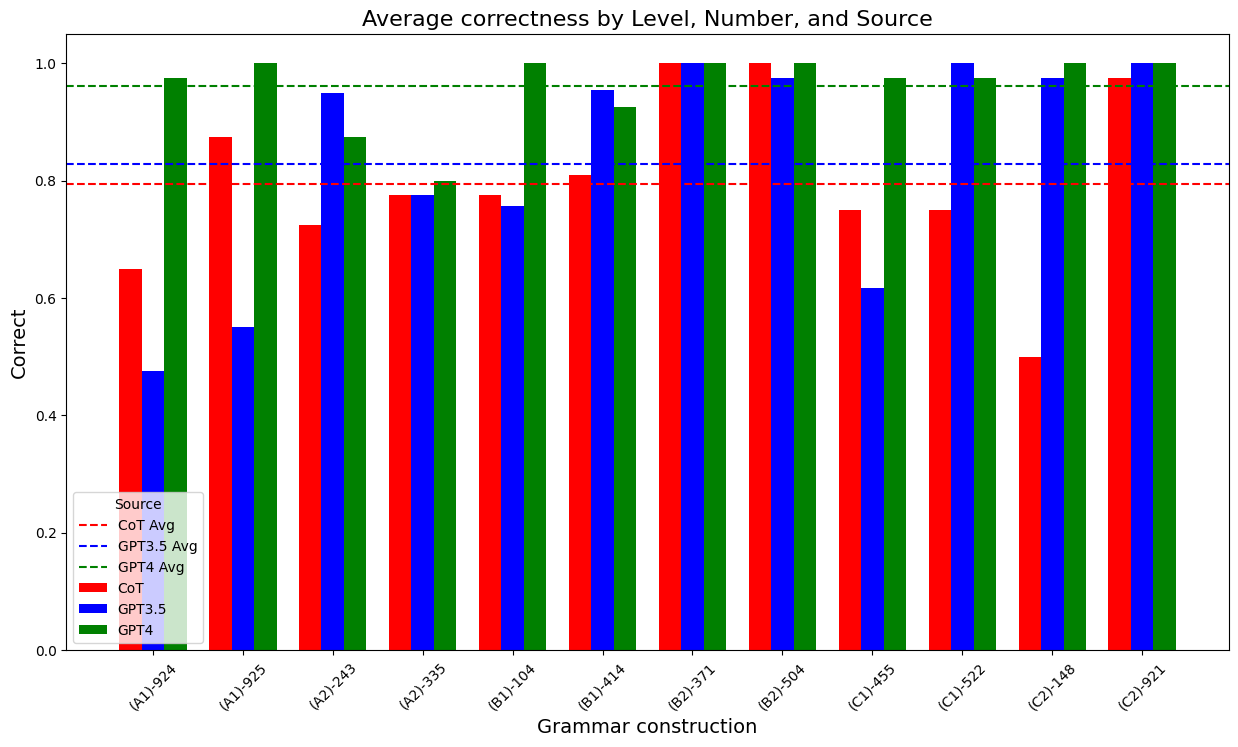

In [23]:
# Creating a pivot table for easier plotting
pivot_df = rating_df.pivot_table(index=['Level', '#'], columns='source', values='correct')

# Preparing x-axis labels with level in parenthesis
x_labels = [f"({level})-{num}" for level, num in pivot_df.index]

# Number of unique combinations of Level and #
n_groups = len(pivot_df.index)

# Creating bar positions for each source
bar_width = 0.25
index = np.arange(n_groups)
positions = [index - bar_width, index, index + bar_width]

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
colors = {"CoT": "red", "GPT3.5": "blue", "GPT4": "green"}
source_averages = rating_df.groupby('source')['correct'].mean()

for pos, source in zip(positions, pivot_df.columns):
    ax.bar(pos, pivot_df[source], bar_width, label=source, color=colors[source])
    ax.axhline(y=source_averages[source], color=colors[source], linestyle='--', label=f"{source} Avg")


# Setting plot details
ax.set_xlabel('Grammar construction', fontsize=14)
ax.set_ylabel('Correct', fontsize=14)
ax.set_title('Average correctness by Level, Number, and Source', fontsize=16)
ax.set_xticks(index)
ax.set_xticklabels(x_labels, rotation=45)
ax.legend(title="Source")

plt.show()

In [ ]:
# Creating a pivot table for easier plotting
pivot_df = rating_df.pivot_table(index=['positive'], columns='source', values='correct')

# Creating bar positions for each source
bar_width = 0.25
index = np.arange(n_groups)
positions = [index - bar_width, index, index + bar_width]

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
colors = {"CoT": "red", "GPT3.5": "blue", "GPT4": "green"}
source_averages = rating_df.groupby('source')['correct'].mean()

for pos, source in zip(positions, pivot_df.columns):
    ax.bar(pos, pivot_df[source], bar_width, label=source, color=colors[source])
    ax.axhline(y=source_averages[source], color=colors[source], linestyle='--', label=f"{source} Avg")


# Setting plot details
ax.set_xlabel('Grammar construction', fontsize=14)
ax.set_ylabel('Correct', fontsize=14)
ax.set_title('Average correctness by Level, Number, and Source', fontsize=16)
ax.set_xticks(index)
ax.set_xticklabels(x_labels, rotation=45)
ax.legend(title="Source")

plt.show()

In [25]:
rating_df.groupby(['positive', 'source'])['correct'].mean()

positive  source
0         CoT       0.731801
          GPT3.5    0.690566
          GPT4      0.933333
1         CoT       0.859504
          GPT3.5    0.979167
          GPT4      0.987500
Name: correct, dtype: float64

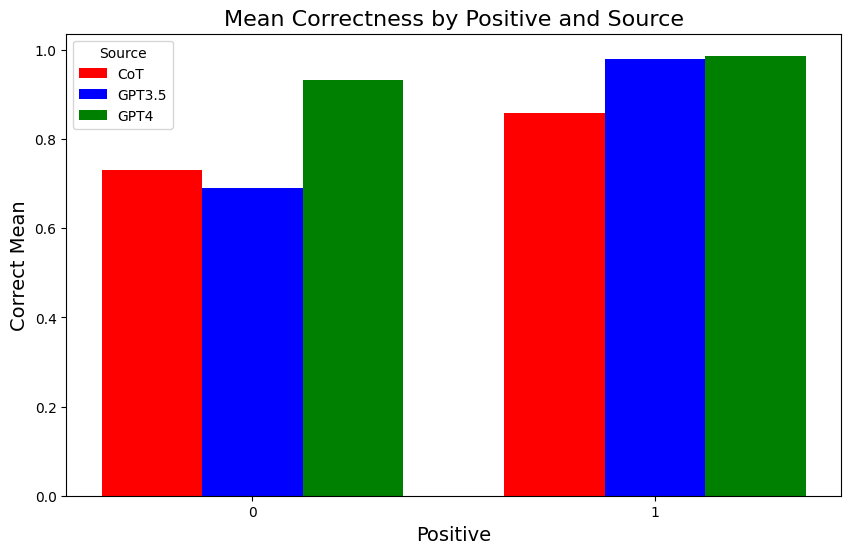

In [28]:
# Creating a pivot table for easier plotting
new_pivot_df = rating_df.pivot_table(index='positive', columns='source', values='correct')

# Number of unique 'Positive' values
n_groups = len(new_pivot_df.index)

# Creating bar positions for each source
index = np.arange(n_groups)
positions = [index - bar_width, index, index + bar_width]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for pos, source in zip(positions, new_pivot_df.columns):
    ax.bar(pos, new_pivot_df[source], bar_width, label=source, color=colors[source])

# Setting plot details
ax.set_xlabel('Positive', fontsize=14)
ax.set_ylabel('Correct Mean', fontsize=14)
ax.set_title('Mean Correctness by Positive and Source', fontsize=16)
ax.set_xticks(index)
ax.set_xticklabels(new_pivot_df.index)
ax.legend(title="Source")

plt.show()